In [24]:
#import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
#load dataset
airbnb_df=pd.read_csv(r'C:\Users\user\Downloads\Airbnb_data.csv')
airbnb_df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [36]:
#understand data
airbnb_df.shape
airbnb_df.columns
airbnb_df.info()
airbnb_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   log_price                74111 non-null  float64
 1   property_type            74111 non-null  int64  
 2   room_type                74111 non-null  int64  
 3   accommodates             74111 non-null  int64  
 4   bathrooms                74111 non-null  float64
 5   bed_type                 74111 non-null  int64  
 6   cancellation_policy      74111 non-null  int64  
 7   cleaning_fee             74111 non-null  int64  
 8   city                     74111 non-null  int64  
 9   host_has_profile_pic     74111 non-null  int64  
 10  host_identity_verified   74111 non-null  int64  
 11  host_response_rate       74111 non-null  float64
 12  instant_bookable         74111 non-null  int64  
 13  latitude                 74111 non-null  float64
 14  longitude             

log_price                  0
property_type              0
room_type                  0
accommodates               0
bathrooms                  0
bed_type                   0
cancellation_policy        0
cleaning_fee               0
city                       0
host_has_profile_pic       0
host_identity_verified     0
host_response_rate         0
instant_bookable           0
latitude                   0
longitude                  0
neighbourhood              0
number_of_reviews          0
review_scores_rating       0
zipcode                    0
bedrooms                   0
beds                       0
host_experience_days       0
days_since_first_review    0
days_since_last_review     0
name_length                0
description_length         0
has_luxury                 0
amenities_count            0
has_wifi                   0
has_kitchen                0
has_heating                0
dtype: int64

In [27]:
#Data Exploration and Preprocessing
airbnb_df.drop(['id', 'thumbnail_url'], axis=1, inplace=True)

In [28]:
#Numeric Columns:Fill with median
for col in ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating']:
    airbnb_df[col].fillna(airbnb_df[col].median(), inplace=True)

#Categorical Columns: Fill with mode (most common value)
for col in ['host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'neighbourhood', 'zipcode']:
    airbnb_df[col].fillna(airbnb_df[col].mode()[0], inplace=True)

#Date Columns:Convert and fill with most frequent valid date
date_cols = ['host_since', 'first_review', 'last_review']
for col in date_cols:
    airbnb_df[col] = pd.to_datetime(airbnb_df[col], errors='coerce')
    airbnb_df[col].fillna(airbnb_df[col].mode()[0], inplace=True)

#Text Columns:Fill with placeholder to avoid null-related errors
airbnb_df['description'].fillna("No description provided", inplace=True)
airbnb_df['name'].fillna("No name provided", inplace=True)
airbnb_df['amenities'].fillna("None", inplace=True)

#Now the dataset has no critical missing values
print(airbnb_df.isnull().sum())


C:\Users\user\AppData\Local\Temp\ipykernel_11160\2312342736.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_df[col].fillna(airbnb_df[col].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11160\2312342736.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64


In [29]:
#Boolean Conversion
airbnb_df['cleaning_fee'] = airbnb_df['cleaning_fee'].astype(int)
airbnb_df['host_has_profile_pic'] = airbnb_df['host_has_profile_pic'].map({'t': 1, 'f': 0})
airbnb_df['host_identity_verified'] = airbnb_df['host_identity_verified'].map({'t': 1, 'f': 0})
airbnb_df['instant_bookable'] = airbnb_df['instant_bookable'].map({'t': 1, 'f': 0})

# Date-Based Feature Extraction
today = pd.to_datetime(datetime.today())

for date_col, new_col in [
    ('host_since', 'host_experience_days'),
    ('first_review', 'days_since_first_review'),
    ('last_review', 'days_since_last_review')
]:
    if date_col in airbnb_df.columns:
        airbnb_df[date_col] = pd.to_datetime(airbnb_df[date_col], errors='coerce')
        airbnb_df[new_col] = airbnb_df[date_col].apply(
            lambda x: (today - x).days if pd.notnull(x) else np.nan
        )
        airbnb_df[new_col].fillna(airbnb_df[new_col].median(), inplace=True)
        airbnb_df.drop(date_col, axis=1, inplace=True)

# host_response_rate: Clean & Convert to Float
if 'host_response_rate' in airbnb_df.columns:
    airbnb_df['host_response_rate'] = airbnb_df['host_response_rate'].fillna('0%')
    airbnb_df['host_response_rate'] = airbnb_df['host_response_rate'].str.replace('%', '', regex=True).astype(float) / 100

# Text-Based Features from name & description
airbnb_df['name'] = airbnb_df['name'].fillna('')
airbnb_df['description'] = airbnb_df['description'].fillna('')

airbnb_df['name_length'] = airbnb_df['name'].apply(lambda x: len(str(x)))
airbnb_df['description_length'] = airbnb_df['description'].apply(lambda x: len(str(x)))
airbnb_df['has_luxury'] = airbnb_df['name'].apply(lambda x: 1 if 'luxury' in str(x).lower() else 0)

# Amenities-Based Features
airbnb_df['amenities'] = airbnb_df['amenities'].fillna('')

airbnb_df['amenities_count'] = airbnb_df['amenities'].apply(lambda x: len(str(x).split(',')))
airbnb_df['has_wifi'] = airbnb_df['amenities'].apply(lambda x: 1 if 'Wifi' in str(x) else 0)
airbnb_df['has_kitchen'] = airbnb_df['amenities'].apply(lambda x: 1 if 'Kitchen' in str(x) else 0)
airbnb_df['has_heating'] = airbnb_df['amenities'].apply(lambda x: 1 if 'Heating' in str(x) else 0)

# Drop raw text columns after feature extraction
airbnb_df.drop(['id', 'name', 'description', 'thumbnail_url', 'amenities'], axis=1, inplace=True, errors='ignore')


C:\Users\user\AppData\Local\Temp\ipykernel_11160\4267500752.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_df[new_col].fillna(airbnb_df[new_col].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11160\4267500752.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [30]:
cat_cols = airbnb_df.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    combined = pd.concat([airbnb_df[col]], axis=0)
    labels, uniques = pd.factorize(combined)
    airbnb_df[col] = labels

In [31]:
X = airbnb_df.drop('log_price', axis=1)
y = airbnb_df['log_price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Model Development 
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 0.3884417868251195
R² Score: 0.7062888552588922


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


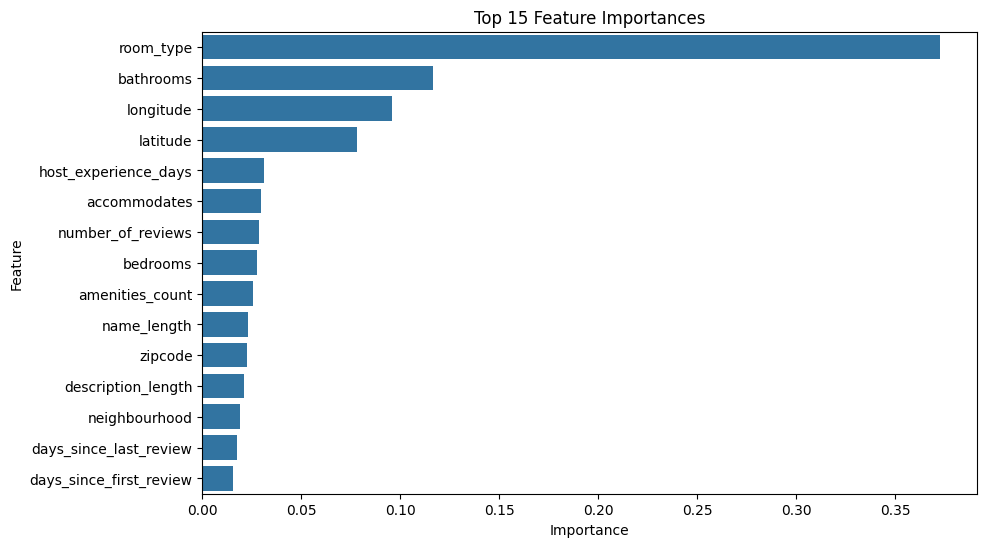

In [35]:
#Model Evaluation 
importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title("Top 15 Feature Importances")
plt.show()